<img style="float: left;" class="center" width="200px" height="200px" src="https://web.njit.edu/~sjyu/download/eovsa/eovsa_logo_RHESSI2021.svg">

## Useful links


*   **Helpdesk** on the Slack channel [#eovsa-imaging](https://join.slack.com/t/eovsatutorial-2021/shared_invite/zt-sob838f4-zvs_qH3M4yTbWGlPIiw6og)
*   EOVSA [browser](http://ovsa.njit.edu/browser)
*   EOVSA [wiki](http://www.ovsa.njit.edu/wiki/index.php/Expanded_Owens_Valley_Solar_Array)
*   EOVSA [1-min averaged CASA ms database](http://www.ovsa.njit.edu/fits/UDBms_slfcaled/)
*   Recent EOVSA [flare events](http://www.ovsa.njit.edu/wiki/index.php/Recent_Flare_List_(2021))
*   SunCASA on [Github](https://github.com/suncasa/suncasa-src) and [PyPI](https://pypi.org/project/suncasa/)




# **Introduction** 
Welcome to the EOVSA tutorial. [EOVSA](http://ovsa.njit.edu/) (Expanded Owens Valley Solar Array) is a new solar-dedicated radio interferometer operated by the New Jersey Institute of Technology. EOVSA observes the full disk of the Sun at all times when the Sun is >10 degrees above the local horizon, which is season dependent and ranges from 7-12 hours duration centered on 20 UT. Like any radio interferometer, the fundamental measurement for imaging is the correlated amplitude and phase between each pair of antennas, which is called a “complex visibility.” EOVSA’s 13 antennas form 78 such visibilities at any frequency and instant of time, i.e. 78 measurements of the spatial Fourier transform of the solar brightness distribution. EOVSA records these visibilities at 451 science frequency channels each second, in four polarization products (`XX`,`YY`,`XY`,`YX`), as well as additional total flux measurements from each individual antenna. These data are then processed through a pipeline processing system (the block diagram in the Figure 1 shows the data flow in the pipeline). One of the outputs of the pipeline is a visibility database in a widely used open-standard format called a CASA measurement set (or “ms”; [CASA](https://casa.nrao.edu/) is the Common Astronomy Software Applications package used by many modern interferometer arrays). 


<img style="float: right;" width="600px" src="https://web.njit.edu/~sjyu/download/eovsa/Pipeline_flowchart.jpeg">

*Fig.1 Pipeline block diagram/flow chart.*

We deliver the radio interferometry data on the following three levels:
* **Level 0** - Raw visibility data from the instrument. This includes observations of cosmic sources for phase calibration, and gain and pointing observations required for total power calibration.
* **Level 1** - Calibrated visibility data. After applying calibration and other preliminary processing to level 0 data, we create the calibrated visibility data in CASA ms format (second column in Figure 1). These visibility data have all of the required content to produce Level 2 images and spectrogram data in standard FITS format. The following tutorial will guide you through how to make EOVSA images and spectrogram from visibility data. We provide a set of standard ms’s for each day (red solid boxes in Figure 1) for users who wish to start with visibility data. You can retrieve EOVSA 1-min averaged visibility data in CASA ms format from this [page](http://www.ovsa.njit.edu/fits/UDBms_slfcaled/). Full-resolution EOVSA visilibity data in CASA ms format will be provide per request. Please contact the EOVSA team if you wish to have Level 1 visibility data for a specific event.
* **Level 2** - Images and spectrogram data in standard FITS format. Most users, however, will prefer to work with spectrogram (frequency-time) and image data, which are also outputs of the pipeline system shown in Figure 1 (orange boxes). Spectrograms are provided as standard FITS tables containing the frequency list, list of times, and data in both total power and a sum of amplitudes over intermediate-length baselines (cross power). Likewise, image data products are in FITS format with standard keywords and are converted into the Helioprojective Cartesian coordinate system compatible with the World Coordinate System (WCS) convention, along with correct registration for the spatial, spectral, and temporal coordinates. Both the spectrogram and image data products are calibrated properly and have physical radio intensity units (sfu for spectrograms and brightness temperature for radio images).



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-vfn0{background-color:#efefef;border-color:#000000;text-align:left;vertical-align:top}
.tg .tg-gfnm{background-color:#efefef;border-color:#000000;text-align:center;vertical-align:middle}
.tg .tg-j4pq{background-color:#efefef;border-color:#000000;text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-vhtn{background-color:#ffffff;border-color:#000000;text-align:center;vertical-align:middle}
.tg .tg-iks7{background-color:#ffffff;border-color:#000000;text-align:left;vertical-align:top}
.tg .tg-jbyd{background-color:#ffffff;border-color:#000000;text-align:center;vertical-align:top}
</style>
<table class="tg">
<caption><strong> List of Level 2 data products</strong> </caption>
<thead>
  <tr>
    <th class="tg-c3ow">category</th>
    <th class="tg-c3ow">data product</th>
    <th class="tg-c3ow">name</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-vhtn">Dynamic Spectrum</td>
    <td class="tg-iks7">All-day TP spectrum</td>
    <td class="tg-iks7">EOVSA_TPall_yyyymmdd.fts</td>
  </tr>
  <tr>
    <td class="tg-jbyd">Dynamic Spectrum</td>
    <td class="tg-iks7">All-day XP spectrum</td>
    <td class="tg-iks7">EOVSA_XPall_yyyymmdd.fts</td>
  </tr>
  <tr>
    <td class="tg-gfnm">Image</td>
    <td class="tg-vfn0">Synoptic 1.4 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw00-01.tb.disk.fits</td>
  </tr>
  <tr>
    <td class="tg-j4pq">Image</td>
    <td class="tg-vfn0">Synoptic 3.0 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw02-05.tb.disk.fits</td>
  </tr>
  <tr>
    <td class="tg-j4pq">Image</td>
    <td class="tg-vfn0">Synoptic 4.5 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw06-10.tb.disk.fits</td>
  </tr>
  <tr>
    <td class="tg-j4pq">Image</td>
    <td class="tg-vfn0">Synoptic 6.8 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw11-20.tb.disk.fits</td>
  </tr>
  <tr>
    <td class="tg-j4pq">Image</td>
    <td class="tg-vfn0">Synoptic 10.2 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw21-30.tb.disk.fits</td>
  </tr>
  <tr>
    <td class="tg-j4pq">Image</td>
    <td class="tg-vfn0">Synoptic 13.9 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw31-43.tb.disk.fits</td>
  </tr>
</tbody>
  <tr>
    <td class="tg-j4pq">Image</td>
    <td class="tg-vfn0">Synoptic 17.0 GHz image</td>
    <td class="tg-vfn0">eovsa_yyyymmdd.spw44-49.tb.disk.fits</td>
  </tr>
</table>

## Browsing and Obtaining EOVSA data
Currently the most convenient way for browsing **Level 2** EOVSA data is through the [EOVSA Browser](http://ovsa.njit.edu/browser/?suntoday_date=2021-05-07). The overview EOVSA dynamic spectra on the top-left panel are from the median of the uncalibrated cross-power visibilities at a few short baselines, which are not (but a good proxy of) the total-power dynamic spectra. The effects of spatial information blended in the cross-power visibilities can be clearly seen as the "U"-shaped features throughout the day, which are due to the movement of the Sun across the sky that effectively changes the length and orientation of the baselines. Flare times can be easily seen in the EOVSA dynamic spectra, which usually appear as vertical bright features across many frequency bands. More information can be found on this [page](http://ovsa.njit.edu/data-browsing.html).

<p><a href="http://ovsa.njit.edu/browser/?suntoday_date=2021-05-07">
<img style="float: right;" src="https://web.njit.edu/~sjyu/download/eovsa/EOVSA_browser.jpg"></a></p>

*Fig.2 EOVSA browser.*

## Software
* **EOVSA visibility data processing**: [SunCASA](https://github.com/suncasa/suncasa) A Python wrapper around [CASA](https://casa.nrao.edu/) for synthesis imaging and visualizing solar spectral imaging data. CASA is one of the leading software tools for "supporting the data post-processing needs of the next generation of radio astronomical telescopes such as ALMA and VLA", an international effort led by the [National Radio Astronomy Observatory](https://public.nrao.edu/). The current version of CASA uses Python (3.6) interface. More information about CASA can be found on [NRAO's CASA website](https://casa.nrao.edu/). 
> **_NOTE:_** CASA is available ONLY on UNIX-BASED PLATFORMS, and therefore, so is SunCASA. 
* **EOVSA image data processing**: [GSFIT](https://github.com/Gelu-Nita/GSFIT) A IDL-widget(GUI)-based spectral fitting package called gsfit, which provides a user-friendly display of EOVSA image cubes and an interface to fast fitting codes (via platform-dependent shared-object libraries). 

For this tutorial, we will demonstrate using **SunCASA** to create EOVSA image and spectrogram from the visibility data observed during a M-class flare on 2021 May 7. There are two approaches in accessing the SunCASA package: 
* [convenient] Through this [notebook](https://github.com/suncasa/suncasa-src/blob/master/examples/EOVSA_tutorial_RHESSI2021.ipynb), together with Google Colaboratory [(colab)](https://colab.research.google.com/) which hosts this notebook on free virtual environment that requires no setup and runs entirely in the cloud. **If you are into this option, skip the following [Installation](#installation) section and go directly to the [Tour](#tour) Section.**
* [comprehensive] Install on your own machine, and run the notebook as a regular Jupyter Notebook. See SunCASA [Installation](#installation) section below and [GSFIT Installation](http://www.ovsa.njit.edu/wiki/index.php/GSFIT_Installation) (GSFIT) for instructions.


<a id='installation'></a>
# **Installation of SunCASA**
> **_NOTE:_** **SunCASA installation is not required to run the Notebook on Colab.  Please go directly to the [Tour](#tour) Section if you want to use Colab.**

PIP wheels for suncasa and its casa dependencies are available as a Python 3 module from [PyPI](https://pypi.org/). This allows simple installation across most of the UNIX-BASED PLATFORMS (Linux & MacOS) and import into standard *Python 3.6* environments. The RHEL 6/7  are the offical supported platforms for the casa modules. We have also tested the SunCASA/CASA packages under other Linux-based platforms such as Ubuntu 18, Scientific Linux 6/7, CentOS 7, as well as MacOS Big Sur to some extent. YMMV for other versions of Linux or macOS. We do not recommend the use of Conda until CASA's compatibility with Conda is better understood. 

## Requirements
The following prerequisites must be present on the host machine before installing SunCASA:

  * Python 3.6 (3.7 may also work but YMMV, because its compability with CASA is not fully understood yet)
  * For Linux: libgfortran3 ([yum](https://access.redhat.com/documentation/en-us/red_hat_enterprise_linux/7/html/system_administrators_guide/ch-yum) or [apt-get](https://help.ubuntu.com/community/AptGet/Howto) install)
  * For MacOS: gcc ([brew](https://brew.sh/) install), [XQuartz](https://www.xquartz.org/) and [Xcode](https://apps.apple.com/us/app/xcode/id497799835?mt=12)


## Installating SunCASA
Installation instructions are as follows (from a UNIX terminal window). First create a Python virtual environment named `suncasaenv` under the `$HOME` directory:

```console
$ cd $HOME
$ python3.6 -m venv suncasaenv
```
> **_NOTE:_**  We strongly recommend using a Python virtual environment to prevent breaking any packages within a pre-existing Python environment.

Then use [pip](https://pypi.org/project/suncasa/) to install SunCASA within the newly-created virtual environment:
```console
$ source suncasaenv/bin/activate
(suncasaenv) $ pip install --upgrade pip
(suncasaenv) $ pip install suncasa
```
> **_NOTE:_**  If this does not work, it could be due to unsuccessful installation of some dependencies. Running these commands should address this.
```console
(suncasaenv) $ pip install casatasks
(suncasaenv) $ pip install casatools
(suncasaenv) $ pip install casadata
(suncasaenv) $ pip install PyQt5
(suncasaenv) $ pip install sunpy[all]
(suncasaenv) $ pip install suncasa
```

To exit the python venv, type `deactivate` from the terminal.  However, the rest of this tutorial **assumes the venv is active** (to reactivate, type `source $HOME/suncasaenv/bin/activate`)

## Updating a previous installation of SunCASA
You can update suncasa to its latest version by running:
```console
(suncasaenv) $ pip install --upgrade suncasa
```

## Sanity check
With the pip installation, SunCASA as well as CASA may be used in a standard Pythonic manner. For example, SunCASA modules and CASA tasks can be invoked using “import”, while CASA tools first need to be instantiated:

```console
(suncasaenv) $ ipython
Python 3.6.9 (default, Jun 16 2021, 22:21:26)
Type 'copyright', 'credits' or 'license' for more information
IPython 7.16.1 -- An enhanced Interactive Python. Type '?' for help.
In [1]: import suncasa
In [2]: help(suncasa)
In [3]: import casatasks
In [4]: help(casatasks)
```


The use of python3 venv is a simple built-in method of containerizing the pip install such that multiple versions of SunCASA can be kept on a single machine in different environments. In addition, SunCASA is built and tested using standard (python 3.6) libraries which can be replicated with a fresh venv, keeping the libraries needed for SunCASA isolated from other libraries which may already be installed on your machine.

<a id='tour'></a>
# **A brief tour of SunCASA**
In this example notebook, we will walk you through some of the basic functionality offered by SunCASA to visualize and analyse EOVSA data. We recommend you to use Google Chrome browser to run the notebook. Other browsers may also work but YMMV.

 Let's first perform a sanity check if suncasa is properly installed.

In [1]:
## wall time of this cell is about 1m 40s.
import time, datetime
t0 = time.time()
t_elapsed = 0
import os, sys

try:
    import suncasa
    print('Suncasa is already installed!')
except:
    ## The step will keep suncasa up-to-date.
    res = os.system("pip install --upgrade suncasa")
    if res == 0:
        print('Suncasa installation successful!')
    else:
        print('Suncasa installation unsuccessful. Abort...')
t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

Suncasa is already installed!
Wall time of this cell: 0:00:00.001199. Elapsed time since the beginning 0:00:00.001199:


Setup the config.py

**A detail:** The following code creates a configuration file to define the EOVSA instrument so that CASA is aware of it.  We plan to add EOVSA officially to the CASA distribution in the future, after which this step is unnecessary.

In [2]:
t0 = time.time()
print("building config file...")
import os
homedir = os.path.expanduser('~/.casa')
if not os.path.exists(homedir):
    os.system("mkdir {}".format(homedir))
with (open(os.path.join(homedir,'config.py'), 'w')) as fi:
    fi.write("import sys \n")
    fi.write("import os \n")
    fi.write("import sysconfig \n")
    fi.write("import casatools \n")
    fi.write("import casadata \n")
    fi.write("import time \n")
    fi.write("logfile='casalog-{}.log'.format(time.strftime('%Y%m%d-%H',time.localtime())) \n")
    fi.write("telemetry_enabled = False \n")
    fi.write("crashreporter_enabled = True \n")
    fi.write("tb=casatools.table() \n")
    fi.write("ospathsep = os.path.sep \n")
    fi.write("libpath = sysconfig.get_paths()['purelib'] \n")
    fi.write("obsdict = {'MJD': 57447.0, 'Name': 'EOVSA', 'Type': 'WGS84', 'Long': -118.287, \n")
    fi.write("            'Lat': 37.2332, 'Height': 1207.13, 'X': 0.0, 'Y': 0.0, 'Z': 0.0,  \n")
    fi.write("            'Source': 'Dale Gary'} \n")
    fi.write("obstable = os.path.join(casadata.datapath,'geodetic','Observatories') \n")
    fi.write("tb.open(obstable, nomodify=True) \n")
    fi.write("if 'EOVSA' not in tb.getcol('Name'): \n")
    fi.write("    print('Adding EOVSA to the Observatories') \n")
    fi.write("    tb.close() \n")
    fi.write("    tb.open(obstable, nomodify=False) \n")
    fi.write("    nrows = tb.nrows() \n")
    fi.write("    tb.addrows(1) \n")
    fi.write("    for k in obsdict.keys(): \n")
    fi.write("        tb.putcell(k, nrows, obsdict[k])     \n")
    fi.write("tb.close() \n")
    fi.close()

print('Config file is written successfully!')

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

building config file...
Config file is written successfully!
Wall time of this cell: 0:00:00.002025. Elapsed time since the beginning 0:00:00.003225:


Use an interactive plotting backend when possible. 

In [3]:
import time, datetime
t0 = time.time()
import matplotlib.pyplot as plt
in_colab = 'google.colab' in str(get_ipython())
if in_colab:
  print('Running on CoLab. Interactive plotting is deactivated.')
  %matplotlib inline
else:
  print('Not running on CoLab. Interactive plotting is activated.')
  %matplotlib notebook
plt.rcParams['figure.figsize'] = (8,8)

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

Not running on CoLab. Interactive plotting is activated.
Wall time of this cell: 0:00:00.426170. Elapsed time since the beginning 0:00:00.429395:


> **Note:** To run suncasa a second time in your own notebook environment (after installation and the config file has been created), the above code is shortened to: 
```console
import suncasa
import matplotlib.pyplot as plt
%matplotlib notebook


## **Download Sample EOVSA Data for the Tutorial**
For this tutorial, we will use the example of a soft X-ray class M4 event that occurred around 19:00 UT on 2021 May 07 (Figure 3).  This event occurred near the solar east limb as viewed from Earth, and was well observed by Solar Orbiter (including the STIX instrument). We also have a table of [other recent EOVSA events](http://www.ovsa.njit.edu/wiki/index.php/Recent_Flare_List_(2021)).

---

<p><a href="http://ovsa.njit.edu/browser/?suntoday_date=2021-05-07">
<img style="float: right;" width="600px" src="https://web.njit.edu/~gary/EOVSA_20210507_M4flare.png"></a></p>

*Fig.3 Dynamic spectrum and lightcurves for the 2021 May 07 M4 flare*

---

EOVSA Level 1 data are distributed in the CASA tables system, known as a Measurement Set (MS). The actual visibility data are stored in a MAIN table that contains a number of rows, each of which is effectively a single timestamp for a single spectral window and a single baseline. In addition to everything already available in CASA, with SunCASA you have access to additional tools that allow you to explore and utilize the radio dynamic spectroscopic imaging data from EOVSA. We also had success in using SunCASA for analyzing data from the [Karl G. Jansky Very Large Array](https://science.nrao.edu/facilities/vla). The steps are very similar to those described here. 

In [4]:
## wall time of this cell is about 15 sec.
import time, datetime
import matplotlib.pyplot as plt
t0=time.time()
visibility_data = '/Volumes/Data/20170820/20220511/eovsa/play_ground/IDB20220511_1830-1850.ms.slfcaled'
# if not os.path.exists(visibility_data):
#     print("downloading MeasurementSet from Web")
#     os.system("wget https://web.njit.edu/~sjyu/download/eovsa/eovsa_tutorial/rhessi2021/{}.tar.gz".format(visibility_data))
#     #!wget https://web.njit.edu/~sjyu/download/eovsa/eovsa_tutorial/rhessi2021/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.tar.gz
#     os.system("tar -xvf IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.tar.gz")
#     print('Data are successfully downloaded.')
# else:
#     print('Measurement set already exists. Skipping download.')
t_elapsed = 0
t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning: {}'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))


Wall time of this cell: 0:00:00.000043. Elapsed time since the beginning: 0:00:00.000043


## **Display Information on the EOVSA Visibility Data (CASA Measurement Set)**

With the pip installation, the CASA modules may be used in a standard Pythonic manner. For example, CASA tasks can be invoked using `import`, while CASA tools are Python classes that first need to be instantiated to create usable objects.  A useful first task to run is listobs, which provides a summary of the measurement set.

In [ ]:
## wall time of this cell is about 3s.
t0 = time.time()
from casatasks import listobs
import os
#visibility_data = '/Users/walterwei/Downloads/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms'
rc = listobs(vis=visibility_data, listfile=visibility_data + '.listobs', overwrite=True)

print(os.popen("cat " + visibility_data + ".listobs").read())
t_elapsed = 0
t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

<IPython.core.display.Javascript object>


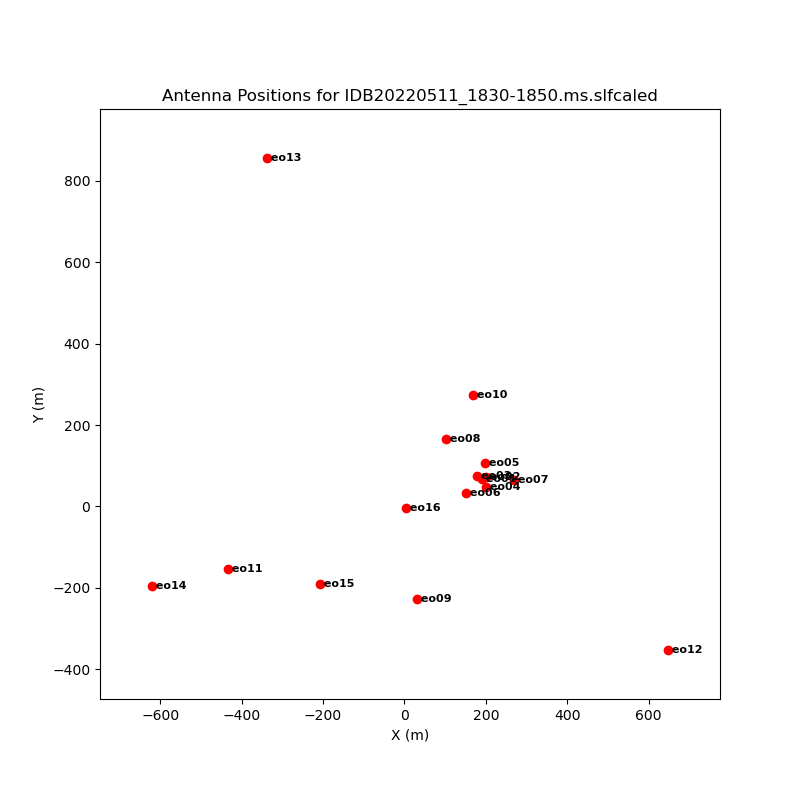

Wall time of this cell: 0:00:01.150236. Elapsed time since the beginning 0:00:01.150279:


In [5]:
t0 = time.time()
#visibility_data = '/Users/walterwei/Downloads/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms'
from casatasks import plotants
plotants(vis=visibility_data)
ax=plt.gca()
ax.set_aspect('equal')

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

## **Now let's make a Cross-Power Dynamic Spectrum**
The first module we introduce is [`dspec`](https://github.com/suncasa/suncasa-src/blob/master/suncasa/utils/dspec.py). This module allows you to generate a cross-power dynamic spectrum from an MS file, and visualize it. You can select a subset of data by specifying a [time range](https://casa.nrao.edu/Release3.3.0/docs/UserMan/UserMansu112.html), [spectral windows/channels](https://casaguides.nrao.edu/index.php/Selecting_Spectral_Windows_and_Channels), [antenna baseline](https://casaguides.nrao.edu/index.php/Antenna/Baseline_Selection_Syntax_with_or_without_Autocorrelations), or [uvrange](https://casa.nrao.edu/Release3.3.0/docs/UserMan/UserMansu113.html). The selection syntax follows the CASA convention. More information of CASA selection syntax may be found in the above links or the [Measurement Selection Syntax](https://casa.nrao.edu/casadocs/casa-5.4.0/data-selection/data-selection-in-a-measurementset) documentation.


ploting dynamic spectrum...


<IPython.core.display.Javascript object>


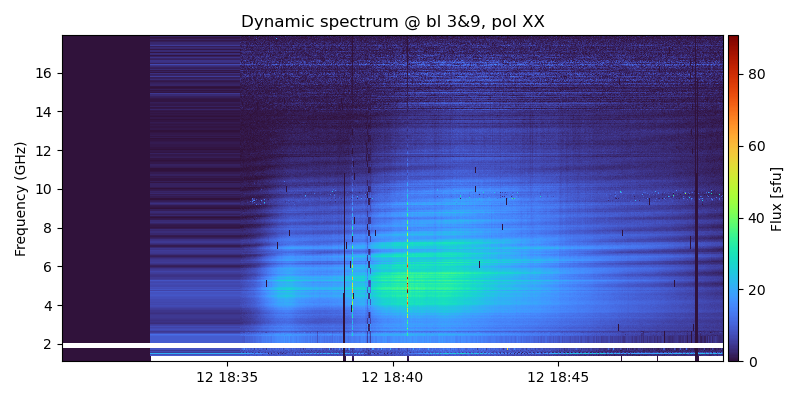

(4, 1, 451, 879)
Wall time of this cell: 0:00:13.962647. Elapsed time since the beginning 0:00:15.112926:


In [6]:
## wall time of this cell is about 3s.
t0 = time.time()
from suncasa import dspec as ds
import time
# The example below shows the cross-power spectrogram from a baseline selected using the parameter "bl".
# bl = '4&9' means selecting a baseline from Antenna ID 4 (Antenna Name "eo05") correlating with Antenna ID 9 (Antenna Name "eo10") - c.f., listobs outputs.
# you can also use the "bl" parameter to select multiple baseline(s), i.e., bl='0&2;4&9;8&11'.
specfile = visibility_data + '.dspec.npz'
d = ds.Dspec(visibility_data, bl='3&9', specfile=specfile)
d.plot(vmin=None, vmax=None, pol='XX')
print(d.data.shape) # npol, nbl, nfreq, ntime

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

Alternatively, users can create a `dspec` instance first, and then use its `get_dspec` function to generate a cross power dynamic spectrum from an MS file. Try it with different combinations of selection parameters.

In [ ]:
# d = ds.Dspec()
# d.get_dspec(visibility_data, specfile=specfile)
# print('selecting all baselines. Data axis polarization, baseline, freq, time:', d.data.shape)
# d.get_dspec(visibility_data, uvrange='0.2~0.8km', specfile=specfile)
# print('selecting baselines with a length in the range of 0.2~0.8km:', d.data.shape)
# d.get_dspec(visibility_data, uvrange='0.2~0.8km', domedian=True, specfile=specfile)
# print('take a median cross all of  baselines:', d.data.shape) 
# d.get_dspec(visibility_data, bl='0&2;4&9', specfile=specfile)
# print('selecting two baselines:', d.data.shape) 
# d.get_dspec(visibility_data, bl='4&9', specfile=specfile)

Generate a plot with the `plot` function

In [9]:
d.plot(vmin=None, vmax=None, pol='XX', cmap='inferno')
print(d.data.shape) # npol, nbl, nfreq, ntime

ploting dynamic spectrum...


<IPython.core.display.Javascript object>

(2, 1, 451, 200)


`dspec` also accepts dynamic spectrum data as input.

ploting dynamic spectrum...
(2, 1, 451, 200)


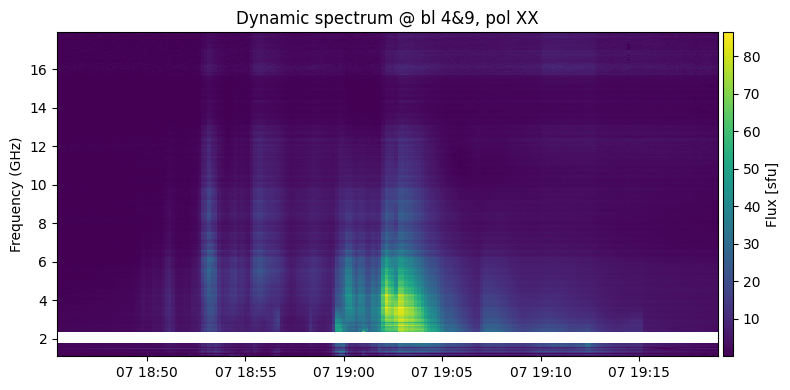

In [ ]:
d = ds.Dspec(specfile)
d.plot(vmin=None, vmax=None, pol='XX')
print(d.data.shape) # npol, nbl, nfreq, ntime

> **_NOTE:_** If you are using your own machine, the plotting should be in interactive mode. In that mode, hovering your mouse over the dynamic spectrum allows you to read the time, frequency and flux information under the cursor at the bottom of the window.

`dspec` also works with the EOVSA All-day TP/XP spectrum data product, which can be downloaded from [EOVSA browser](http://ovsa.njit.edu/browser/?suntoday_date=2021-05-07).  The TP spectrum includes the background solar disk flux density, which grows from about 100 sfu at 1 GHz to >500 sfu at 18 GHz.

downloading Total Power Dynamic Spectrum data from Web
--2022-04-01 00:30:34--  http://ovsa.njit.edu/fits/synoptic/2021/05/07/EOVSA_TPall_20210507.fts
Resolving ovsa.njit.edu (ovsa.njit.edu)... 192.100.16.206
Connecting to ovsa.njit.edu (ovsa.njit.edu)|192.100.16.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65571840 (63M)
Saving to: ‘EOVSA_TPall_20210507.fts’

EOVSA_TPall_2021050 100%[===================>]  62.53M  8.15MB/s    in 7.3s    

2022-04-01 00:30:42 (8.52 MB/s) - ‘EOVSA_TPall_20210507.fts’ saved [65571840/65571840]

Data are successfully downloaded.
ploting dynamic spectrum...
(451, 36180) (36180,) (451,)
Wall time of this cell: 0:00:13.386117. Elapsed time since the beginning 0:01:44.777020:


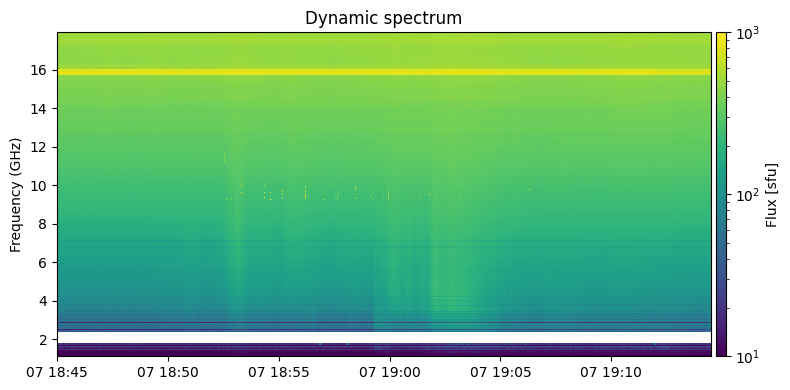

In [ ]:
## wall time of this cell is about 20s.
t0 = time.time()
## 
tpfile = 'EOVSA_TPall_20210507.fts'
if not os.path.exists(tpfile):
    print("downloading Total Power Dynamic Spectrum data from Web")
    !wget http://ovsa.njit.edu/fits/synoptic/2021/05/07/EOVSA_TPall_20210507.fts
    print('Data are successfully downloaded.')
else:
    print('Total Power Dynamic Spectrum data already exists. Skipping download.')
from matplotlib.colors import LogNorm
## load the total power data
d_tp = ds.Dspec(tpfile)
## plot it
d_tp.plot(norm=LogNorm(vmin=10,vmax=1000), timerange=['2021-05-07T18:45:00','2021-05-07T19:15:00'])
print(d_tp.data.shape,d_tp.time_axis.shape,d_tp.freq_axis.shape)

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

In [ ]:
res = os.system("pip install --upgrade suncasa")

In [ ]:
from importlib import reload
from suncasa.utils import qlookplot as ql

## **Quick-Look Imaging Example**

We use CASA's CLEAN algarithm for EOVSA imaging. As the default coordinate system is equatorial, solar coordinate transformation and image registration need to be done to place the image into the usual Helioprojective Cartesian Coordinates (X- and Y-axes are Solar X and Solar Y in arcsecond unit, respectively). We have bundled a number of these steps into a module named [`qlookplot`](https://github.com/suncasa/suncasa-src/blob/master/suncasa/utils/qlookplot.py). The module allows users to generate an observing summary plot of the cross-power dynamic spectrum, GOES light curves and EOVSA quick-look images. The parameters below create a quick-look EOVSA image with a 10-s integration at 19:02 UT using spectral window IDs 2 to 5 (bands 5 to 8, see above listobs output), which correspond to the frequency range of 2.4–3.7 GHz.

In [18]:
## wall time of this cell is about 45s.
t0 = time.time()
from suncasa.utils import qlookplot as ql
## (Optional) Supply the npz file of the dynamic spectrum from previous step.
## If not provided, the program will generate a new one from the visibility.
## set the time interval
timerange = '19:02:00~19:02:20'
## select frequency range from 2.5 GHz to 3.5 GHz
spw = '2~5'
## select stokes XX
stokes = 'XX'
## turn off AIA image plotting, default is True
plotaia = True
ql.qlookplot(vis=visibility_data, specfile=specfile, timerange=timerange, spw=spw, \
    stokes=stokes, plotaia=plotaia, restoringbeam=['60arcsec'], robust=0.5, aiawave =211)

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

<IPython.core.display.Javascript object>

plot the dynamic spectrum in pol XX


Files Downloaded: 0file [00:00, ?file/s]

Error in downloading GOES soft X-ray data. Proceeding with out soft X-ray plot.
This is EOVSA data
do clean for 2021/05/07/19:02:00~2021/05/07/19:02:20 in spw 2~5 stokes XX
Original phasecenter: 0.77948273873719790.295749074341333
use phasecenter: J2000 0.7794827387371979rad 0.295749074341333rad
msinfo is derived from: /Users/walterwei/Downloads/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms
fits file EOVSA_20210507T190210.000000.image.fits selected


NameError: name 't_elapsed' is not defined

There are empty panels because we have only selected one polarization ("XX") for imaging/spectroscopy. Feel free to explore by adjusting the above parameters, e.g. use a different time range (`timerange` parameter) and/or frequency range (`spw` parameter).
> **_NOTE:_** The GOES light curves plotting may fail on Python 3.6. We are working on solving the issue. 



With `qlookplot`, it is easy to engage solar data from SDO/AIA in the summary plot. Setting `plotaia=True` in the qlookplot command will download SDO/AIA data at the given time to the current directory and add it to the summary plot. The default AIA passband is 171 A. Use the aiawave parameter (e.g. `aiawave=94`) to select a different passband.

plot the dynamic spectrum in pol XX


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

1 passbands to download


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_171a_2021_05_07t19_02_09_35z_image_lev1.fits:   0%|          | 0.00/11.5M [00:00<?, ?B/s]

/root/sunpy/data/aia_lev1_171a_2021_05_07t19_02_09_35z_image_lev1.fits aia.lev1_euv_12s.2021-05-07T190209Z.171.image_lev1.fits
Wall time of this cell: 0:00:53.154176. Elapsed time since the beginning 0:03:31.996445:


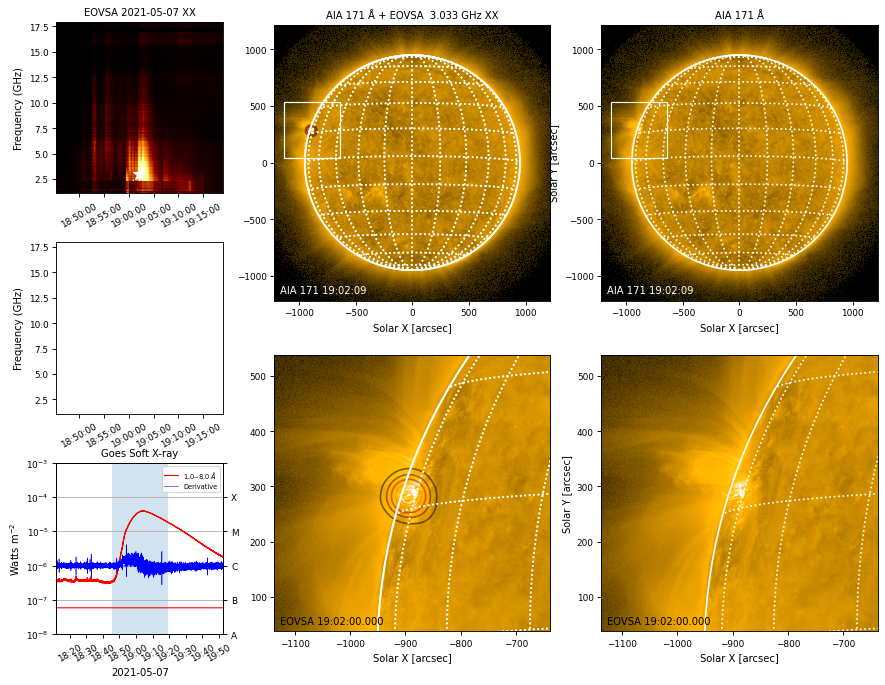

In [ ]:
## the wall time of this cell is about 55s.
t0 = time.time()
## set overwrite=False to use the radio image from previous step.
overwrite = False
## read the file name from the previous cell
outfits = 'EOVSA_20210507T190205.000000.outim.image.fits'
ql.qlookplot(vis=visibility_data, specfile=specfile, timerange=timerange, spw=spw, \
    stokes=stokes, plotaia=True, outfits = outfits, overwrite=overwrite, \
    restoringbeam=['60arcsec'],robust=0.5)

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

The resulting radio image is a 4-D datacube (in solar X-pos, Y-pos, frequency, and polarization), which is, by default, saved as a fits file `Instrument_yymmddTHHMMS.ffffff.outim.image.fits` under your working directory. An alternate name for the output fits file can be specified using the `outfits` parameter. In this example, we combine all selected frequencies (specified in keyword `spw`) into one image (i.e., multi-frequency synthesis). Therefore the third axis only has one plane. The fourth axis contains polarization. In this example, the fourth axis only has one plane as well (`XX`). Here is the relevant information (first few lines) in the header of the resulting FITS file.
```console
In [1]: from astropy.io import fits
In [2]: hdu = fits.open('EOVSA_20210507T190230.000000.outim.image.fits')[0]
In [3]: hdu.header
Out[3]:
SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -64 / array data type
NAXIS   =                    4 / number of array dimensions
NAXIS1  =                  512 / Nx
NAXIS2  =                  512 / Ny
NAXIS3  =                    1 / number of frequencies
NAXIS4  =                    1 / number of polarizations
```

By default, `qlookplot` produces a full sun radio image (512x512 with a pixel size of 5"). If you know where the radio source is (e.g., from the previous full-Sun imaging), you can make a partial solar image around the source by specifying the image center (`xycen`), pixel scale (`cell`), and image field of view (`fov`). Here we show an example that images for each spectral window in this data set (from spw 0 to 49) at the same time interval around 19:02 UT. At high frequencies, the microwave source concentrates near the flare site, corresponding pretty well with the flare kernel in SDO/AIA. At low frequencies, the microwave source extends to higher altitudes in the corona. Again, feel free to change some of these parameters to explore what they do.

<IPython.core.display.Javascript object>


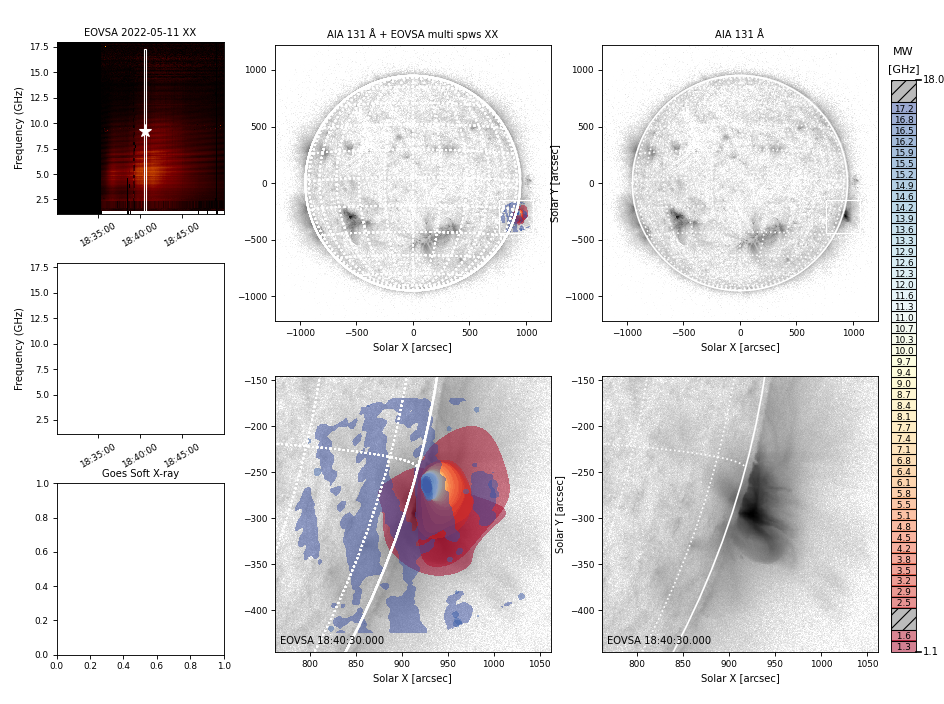

plot the dynamic spectrum in pol XX


Files Downloaded: 0file [00:00, ?file/s]

Error in downloading GOES soft X-ray data. Proceeding with out soft X-ray plot.
1 passbands to download


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_131a_2022_05_11t18_40_30_62z_image_lev1.fits:   0%|          | 0.00/8.43M [00:00<?, ?B/s]

/Users/walter/sunpy/data/aia_lev1_131a_2022_05_11t18_40_30_62z_image_lev1.fits aia.lev1_euv_12s.2022-05-11T184030Z.131.image_lev1.fits
This is EOVSA data
Original phasecenter: 0.84219245719962240.31278925583449996
use phasecenter: J2000 0.8384368274315377rad 0.30981796597201594rad
do clean for 2022/05/11/18:40:30~2022/05/11/18:40:40 stokes XX


Processing spectral window: 100%|██████████| 48/48 [01:05<00:00,  1.37s/it]


msinfo is derived from: /Volumes/Data/20170820/20220511/eovsa/play_ground/IDB20220511_1830-1850.ms.slfcaled
wrapped fits written as EOVSA_20220511T184035.000000.outim.image.allbd.fits
Wall time of this cell: 0:02:27.233492. Elapsed time since the beginning 0:02:42.346418:


In [7]:
## the wall time of this cell is about 4m.
t0 = time.time()
from suncasa.utils import qlookplot as ql
from suncasa.utils.mstools import time2filename
#visibility_data = '/Volumes/Data/20170820/20220511/eovsa/eovsa_data/msdata/IDB20220511_1830-1850.ms.slfcal'
## (Optional) Supply the npz file of the dynamic spectrum from previous step.
## If not provided, the program will generate a new one from the visibility.
## set the time interval
timerange = '18:40:30~18:40:40'
## select (almost) all spectral windows from spw id #0 to #47
spw = ['{}'.format(l) for l in range(48)]
outfits = time2filename(visibility_data,timerange=timerange)+'.outim.image.allbd.fits'
## select stokes XX
stokes = 'XX'
## image center for clean in solar X-Y in arcsec
xycen=[912.0,-295.0]
## pixel scale
cell=['2.0arcsec'] 
## number of pixels in X and Y. If only one value is provided, NX = NY
imsize=[128]
## field of view of the zoomed-in panels in unit of arcsec
fov = [300,300]
## turn off AIA image plotting, default is True
plotaia = True
## AIA passband in Å. The options are [171,131,304,335,211,193,94,1600,1700]
aiawave = 131
## Choose the coloar map for AIA images. If not provided, the program will use default AIA colormap.
acmap = 'gray_r'

ql.qlookplot(vis=visibility_data, specfile=specfile, timerange=timerange, 
             spw=spw, stokes=stokes, plotaia=plotaia, aiawave=aiawave, 
             restoringbeam=['50arcsec'], robust = 0.5, acmap=acmap,
             imsize=imsize,cell=cell,xycen=xycen,fov=fov, 
             outfits=outfits,overwrite=False)

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

## **View Images with `AstroPy` and `SunPy`**

All the output radio imaging files are in standard FITS format in the Helioprojective Cartesian coordinate system (that most spacecraft solar image data adopt; FITS header `CTYPE` is `HPLN-TAN` and `HPLT-TAN`). They are fully compatible with [the SSWIDL map suite](https://hesperia.gsfc.nasa.gov/rhessidatacenter/complementary_data/maps/) which deals with FITS files. With the EOVSA images generated above, you can plot them with either `AstroPy` and `SunPy` routines in Python or `SSW` routines in IDL. The following script ([Github link](https://github.com/suncasa/suncasa-src/blob/master/examples/EOVSA_tutorial_plottingwithAIA.py)) is an example using `AstroPy` and `SunPy` to plot EOVSA multi-frequency images as filled contours (30% of the respective maximum intensity), overlaid on a SDO/AIA map (171 Å in this example).

Wall time of this cell: 0:00:01.212418. Elapsed time since the beginning 0:06:50.964528:


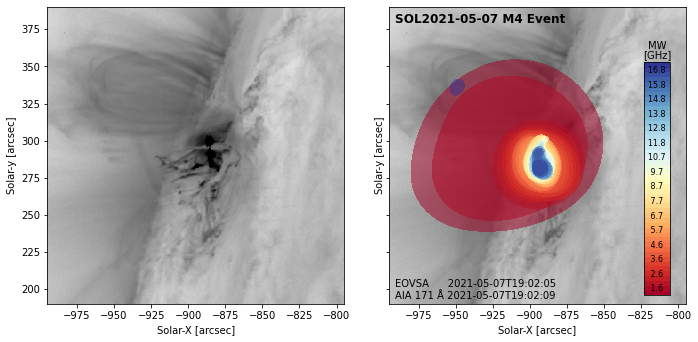

In [ ]:
t0 = time.time()
import os
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
from suncasa.utils import fitsutils as fu
from sunpy import map as smap
import copy

## SDO/AIA image fits
aiafile = 'aia.lev1_euv_12s.2021-05-07T190209Z.171.image_lev1.fits'
# aiafile = 'aia.lev1_uv_24s.2021-05-07T190214Z.1600.image_lev1.fits'
## EOVSA image fits created above
eofile = 'EOVSA_20210507T190205.000000.outim.image.allbd.fits'

## image center ("xycen"), pixel scale ("cell"), and image field of view ("fov")
## for the plots
xycen = np.array([-895, 290])
fov = np.array([200, 200])
xlim = xycen[0] + np.array([-1, 1]) * 0.5 * fov[0]
ylim = xycen[1] + np.array([-1, 1]) * 0.5 * fov[1]
## Select the lower 48 spectral windows for plotting
fidxs = np.arange(0, 48)
## The alpha blending value for , between 0 (transparent) and 1 (opaque).
alpha = 0.5
## The respective maximum intensity of EOVSA images
vmin = 0.3 


## Get solar coordinates of every pixels in the radio image.
rmap, ndim, npol_fits, stokaxis, rcfreqs, rdata, rheader = fu.read_compressed_image_fits(eofile)
nspw = len(rcfreqs)
eodate = Time(rmap.date.mjd + rmap.exposure_time.value / 2. / 24 / 3600, format='mjd')
ny, nx = rmap.data.shape
x0, x1 = (np.array([1, rmap.meta['NAXIS1']]) - rmap.meta['CRPIX1']) * rmap.meta['CDELT1'] + \
         rmap.meta['CRVAL1']
y0, y1 = (np.array([1, rmap.meta['NAXIS2']]) - rmap.meta['CRPIX2']) * rmap.meta['CDELT2'] + \
         rmap.meta['CRVAL2']
dx = rmap.meta['CDELT1']
dy = rmap.meta['CDELT2']
mapx, mapy = np.linspace(x0, x1, nx), np.linspace(y0, y1, ny)

## Plot the AIA maps on the background
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.8), sharex=True, sharey=True)
aiacmap = copy.copy(plt.get_cmap('gray_r'))
aiacmap.set_under('white')
aiacmap.set_over('k')
aiamap = smap.Map(aiafile)
ax = axs[0]
aiamap.plot(axes=ax, cmap=aiacmap)
ax = axs[1]
aiamap.plot(axes=ax, cmap=aiacmap)

## Plot EOVSA images as filled contour on top of the AIA image
vmins = np.array([vmin] * len(rcfreqs))
spwcmap = plt.get_cmap('RdYlBu')
colors_spws = spwcmap(np.linspace(0, 1, nspw))
cts = []

for idx, fidx in enumerate(fidxs):
    data = rdata[0, fidx, ...]
    clevels1 = np.linspace(vmins[idx], 1.0, 2) * np.nanmax(data)
    cts.append(ax.contourf(mapx, mapy, data, levels=clevels1,
                           # colors=[colors_spws[fidx]] * len(clevels1), ## contour
                           colors=[colors_spws[fidx]],  ## contourf
                           alpha=alpha))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
for ax in axs:
    ax.set_xlabel('Solar-X [arcsec]')
    ax.set_ylabel('Solar-y [arcsec]')
    ax.set_title('')
ax.text(0.02, 0.98, 'SOL2021-05-07 M4 Event', ha='left', va='top', color='k', transform=ax.transAxes, fontsize=12,
        fontweight='bold')
ax.text(0.02, 0.01, ' '.join(['AIA {:.0f} Å'.format(aiamap.wavelength.value), aiamap.date.datetime.strftime('%Y-%m-%dT%H:%M:%S')]), ha='left',
        va='bottom',
        color='k', transform=ax.transAxes)
ax.text(0.02, 0.05, ' '.join(['EOVSA     ', eodate.datetime.strftime('%Y-%m-%dT%H:%M:%S')]), ha='left', va='bottom',
        color='k', transform=ax.transAxes)

## Add the color bar for the EOVSA multi-frequency images
ax1_pos = ax.get_position().extents
caxwidth = (ax1_pos[2] - ax1_pos[0]) * 0.1
caxcenter = ax1_pos[2] + caxwidth * 0.75
cayheight = ax1_pos[3] - 0.06 - ax1_pos[1]
rcfreqsplt = rcfreqs
bdwidth = np.nanmean(np.diff(rcfreqsplt))
bounds = np.linspace(rcfreqsplt[0] - bdwidth / 2.0, rcfreqsplt[-1] + bdwidth / 2.0, len(rcfreqsplt) + 1)
ticks = rcfreqsplt[1:][::3]
cax = plt.axes((caxcenter - caxwidth / 2.0, ax1_pos[1], caxwidth, cayheight))

cb = colorbar.ColorbarBase(cax, norm=colors.Normalize(vmax=rcfreqsplt[-1], vmin=rcfreqsplt[0]), cmap=plt.cm.RdYlBu,
                           orientation='vertical', boundaries=bounds, spacing='uniform', ticks=ticks,
                           format='%4.1f  ', alpha=1)
plt.text(0.5, 1.05, 'MW', ha='center', va='bottom', transform=cax.transAxes, color='k', fontweight='normal')
plt.text(0.5, 1.01, '[GHz]', ha='center', va='bottom', transform=cax.transAxes, color='k', fontweight='normal')

cax.xaxis.set_visible(False)
cax.tick_params(axis="y", direction="in", pad=-21.5, length=0, colors='k', labelsize=8)

fig.tight_layout()

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))


## Downloading files to your local file system
Once you have produced the images, you may retrieve the output images to your local computer.

Colab supports downloading one file at a time. If you try to download multiple files or a folder, you can use a file compression utility such as [`tar`](https://manpages.ubuntu.com/manpages/xenial/en/man1/tar.1.html) to combine multiple files or folders into a compressed archive file.
For example:


*   To combine multiple files into a compressed archive file (e.g., `your_files.tar.gz`) with `tar`, use the following command (replace `file1` and `file2` with the names of the files you want to combine):
```console
In [1]: os.system('tar -zcvf your_files.tar.gz file1 file2')
```
> **Tip**: using wildcards supply a whole list of files, e.g., combining all the fits files under the current directory with the following command `os.system('tar -zcvf your_files.tar.gz *.fits')`

*  To use `tar` to combine all the files in a directory into a compressed archive file (e.g., your_files.tar.gz), use the following command (replace `/path/to/your/directory` with the absolute path to the directory containing the files you want to combine):
```console
In [1]: os.system('tar -cvzf your_files.tar.gz /path/to/your/directory')
```

Then you can download the file from Colab using `files.download`, which will invoke a browser download of the file to your local computer.  

Try it! Running the following cell will download all the fits files you have created in the main folder to your local directory on your own machine.  

In [ ]:
from google.colab import files
os.system('tar -cvzf images.tar.gz *.fits')
files.download('images.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Quick-Look Imaging Series
`qlookplot` is capable of gererating multi-freqneucy spectral imaging maps, and iterating over time to produce a time series of these maps. An example script can be found at this [Github link](https://github.com/suncasa/suncasa-src/blob/master/examples/EOVSA_tutorial_qlook_imaging_series.py). The script enables parallel-processing by using a customized task `ptclean` to invoke more CPU processes for parallel-processing on MacOS (Darwin) platform. The `ptclean` parallelization on Linux platform is currently broken, and the fix is still a work-in-progress.

Additional speed-up is enabled by the `casampi` package, which provides a task-level MPI parallelization infrastructure for CASA.  The casatasks module detects when casampi is available and enables the parallel processing capabilities of CASA. 

Let's install `casampi` via pip.

In [ ]:
## the wall time of this cell is about 1m.
t0 = time.time()
!pip install wheel
!pip install casampi
t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

     |████████████████████████████████| 61kB 2.3MB/s 
     |████████████████████████████████| 1.4MB 5.0MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2065213 sha256=41d2c6b971b56bc8fbae4271c18f3ba6db19c6450552217753d68a1e0208b4d3
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py
Wall time of this cell: 0:01:00.198075. Elapsed time since the beginning 0:10:00.921648:


Then download and run the script:

In [ ]:
## the wall time of this cell is about 4m.
t0 = time.time()
import os
import multiprocessing
scriptname='EOVSA_tutorial_qlook_imaging_series.py'
if not os.path.exists(scriptname):
  print("downloading imaging series script from GitHub")
  os.system('wget https://raw.githubusercontent.com/suncasa/suncasa-src/master/examples/'+scriptname)
nthreads = multiprocessing.cpu_count()
if in_colab:
  ## Colab notebooks execute as root, so in Colab the `--allow-run-as-root` flag must be included. 
  os.system('mpirun --allow-run-as-root -q -n {} python {}'.format(nthreads, scriptname))
else:
  ## running the script on platform other than Colab does not require `--allow-run-as-root` flag
  os.system('mpirun -q -n {} python {}'.format(nthreads, scriptname))

t_exec = time.time()-t0
t_elapsed += t_exec
print('Wall time of this cell: {}. Elapsed time since the beginning {}:'.format(datetime.timedelta(seconds=t_exec),datetime.timedelta(seconds=t_elapsed)))

downloading imaging series script from GitHub
Wall time of this cell: 0:04:22.768584. Elapsed time since the beginning 0:14:23.690233:


> **Note** You can also run the script without using the `openmpi` environment.
```
In [1]: os.system('python EOVSA_tutorial_qlook_imaging_series.py') 
```

The output fits images and a summary file imresfile are saved under `./qlookfits`. The naming convention of output fits images is `yymmddTHHMMSS.fff.spw.fits`. The summary yields the time, frequency, and path to every image.
```console
In [1]: imresfile='./qlookfits/IDB20210507_1840-1920XXYY.cal.10s.slfcaled.ms.imres.npz'
In [2]: imres = np.load(imresfile, allow_pickle=True)
In [3]: imres.keys()
['Succeeded', 'BeginTime', 'EndTime', 'ImageName', 'Spw', 'Vis', 'Freq', 'Obs']
Out[3]:
Ib [4]: !ls qlookfits/*.fits | head -5
Out[4]:
qlookfits/20210507T190130.500.spw00-01.fits
qlookfits/20210507T190130.500.spw00-03.fits
qlookfits/20210507T190130.500.spw05.fits
qlookfits/20210507T190130.500.spw10.fits
qlookfits/20210507T190130.500.spw15.fits
```
The output plots and a wrapped mp4 movie are saved under `./qlookimgs`. The naming convention of output fits images is `Instrument_qlimg_yymmddTHHMMSS.fff.png`. 

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('./qlookimgs/movie.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

To download the time-series fits files and the metadata file `./qlookfits`, you can run the cell below (but it results in a large file!).


In [ ]:
from google.colab import files
os.system('tar -cvzf imageseries.tar.gz qlookfits/*')
files.download('imageseries.tar.gz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>